## Cartopy in a nutshell

Cartopy is a Python package that provides easy creation of maps, using matplotlib, for the visualisation of geospatial data.

In order to create a map with cartopy and matplotlib, we typically need to import `pyplot` from `matplotlib` and cartopy's `crs` (coordinate reference system) submodule. These are usually imported as follows:

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Cartopy's matplotlib interface is set up via the **`projection`** keyword when constructing a matplotlib `Axes` / `SubAxes` instance. The resulting axes instance has new methods, such as the **`coastlines()`** method, which are specific to drawing cartographic data:

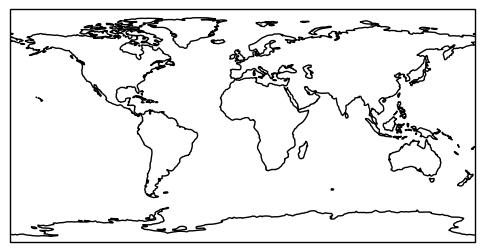

In [2]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

Cartopy can draw maps in many different projections, from the very mundane to the more unusual:

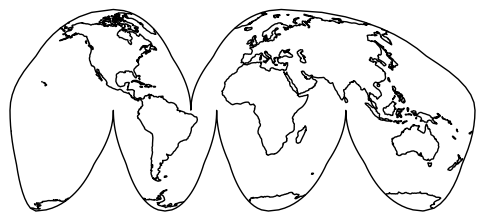

In [3]:
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()
plt.show()

A full list of Cartopy projections is available at http://scitools.org.uk/cartopy/docs/latest/crs/projections.html.

To draw cartographic data, we use the the standard matplotlib plotting routines with an additional **`transform`** keyword argument. The value of the **`transform`** argument should be the cartopy coordinate reference system *of the data being plotted*:

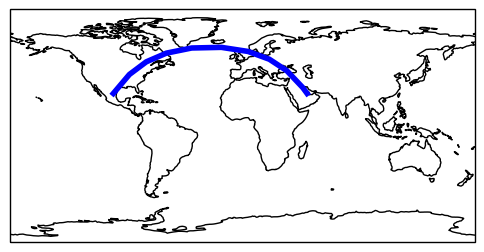

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.plot([-100, 50], [25, 25], linewidth=4, transform=ccrs.Geodetic())
plt.show()

Notice that unless we specify a map extent (we did so via the **`set_global()`** method in this case) the map will zoom into the range of the plotted data.

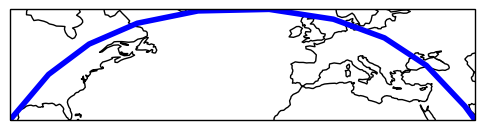

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.plot([-100, 50], [25, 25], linewidth=4, transform=ccrs.Geodetic())
plt.show()

We can add graticule lines and tick labels to the map using the gridlines method (this currently is limited to just a few coordinate reference systems):

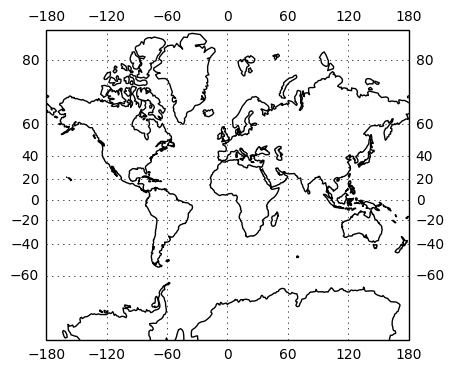

In [6]:
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
plt.show()

We can control the specific tick values by using matplotlib's locator object, and the formatting can be controlled with matplotlib formatters:

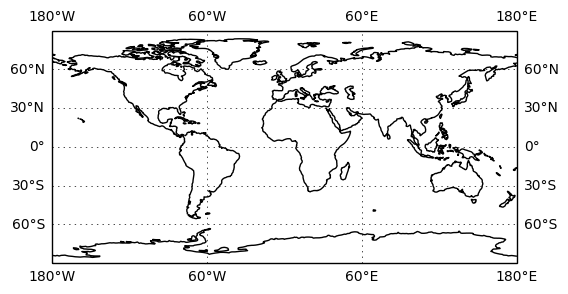

In [7]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import (LATITUDE_FORMATTER,
                                   LONGITUDE_FORMATTER)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.xlocator = mticker.FixedLocator([-180, -60, 60, 180])
gl.yformatter = LATITUDE_FORMATTER
gl.xformatter = LONGITUDE_FORMATTER

plt.show()

Cartopy cannot currently label all types of projection, though more work is intended on this functionality in the future.

### Exercise 1

The following snippet of code produces coordinate arrays and some data in a rotated pole coordinate system. The coordinate system for the `x` and `y` values, which is similar to that found in the some limited area models of Europe, has a projection "north pole" at 177.5°E longitude and 37.5°N latitude.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

x = np.linspace(310, 390, 25)
y = np.linspace(-24, 25, 35)
x2d, y2d = np.meshgrid(x, y)

data = np.cos(np.deg2rad(y2d) * 4) + np.sin(np.deg2rad(x2d) * 4)

**Part 1**

Define a cartopy coordinate reference system which represents a rotated pole with a pole latitude of 37.5°N and a pole longitude of 177.5°E.

** Part 2**

Produce a map, with coastlines, using the coordinate reference system created in Part 1 as the projection.

**Part 3**

Produce a map, with coastlines, in a plate carrée (**`ccrs.PlateCarree()`**) projection with a pcolormesh of the data generated by the code snippet provided at the beginning of the exercise. Remember that the data is supplied in the rotated coordinate system defined in Part 1.

### Understanding `projection` and `transform`

It can be easy to get confused about what the **`projection`** and **`transform`** arguments actually mean.
We'll use the rotated pole example to illustrate the effect of each.

In [9]:
rotated_pole = ccrs.RotatedPole(pole_latitude=37.5,
                                pole_longitude=177.5)

The core concept here is that the projection of your axes is independent of the coordinate system your data is defined in. The **`projection`** argument used when creating plots determines the projection of the resulting plot. The **`transform`** argument to plotting functions tells cartopy what coordinate sytstem your data uses.

Let's try making a plot without specifying the transform argument.
Since the data happens to be defined on the same coordinate system as we are plotting in this actually works OK:

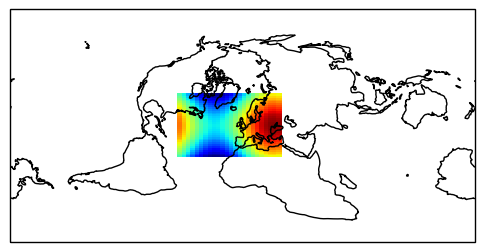

In [10]:
ax = plt.axes(projection=rotated_pole)
ax.coastlines()
ax.set_global()
ax.pcolormesh(x, y, data)  # omitted the transform keyword!
plt.show()

Now let's add in the transform keyword when we plot.
See that the plot doesn't change, this is because the default assumption when the **`transform`** argument is not supplied is that the coordinate system matches the projection.

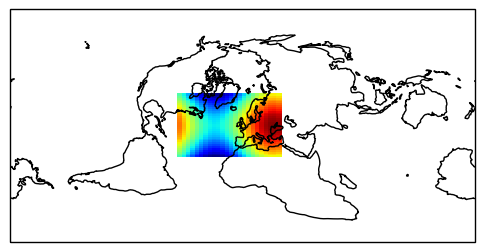

In [11]:
ax = plt.axes(projection=rotated_pole)
ax.coastlines()
ax.set_global()
ax.pcolormesh(x, y, data, transform=rotated_pole)
plt.show()

Now we'll try this again, omitting the **`transform`** argument, but this time using a projection that does not match the coordinate system the data are defined in.
The data are plotted in the wrong place, because cartopy assumed the coordinate system of the data matched the projection, which is **`PlateCarree()`**.

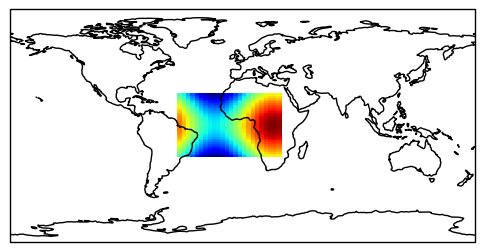

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.pcolormesh(x, y, data)  # omitted the transform keyword,
                           # this is now incorrect!
plt.show()

In order to get the correct plot we need to tell cartopy the data are defined in a rotated pole coordinate system:

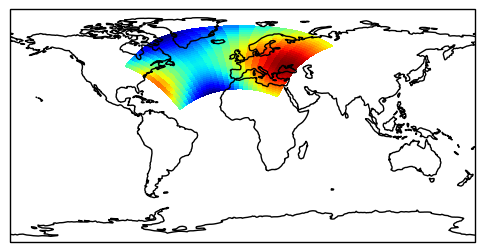

In [13]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.pcolormesh(x, y, data, transform=rotated_pole)
plt.show()

The safest thing to do is always provide the **`transform`** keyword regardless of the projection you are using, and avoid letting cartopy make assumptions about your data's coordinate system. Doing so allows you to choose any map projection for your plot and allow cartopy to plot your data where it should be.

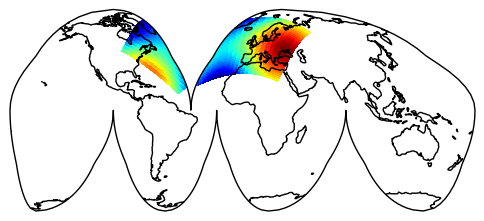

In [14]:
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()
ax.set_global()
ax.pcolormesh(x, y, data, transform=rotated_pole)
plt.show()

## Next steps

In the next couple of sessions we'll discuss the tools Iris and CIS.
These tools both understand coordinate systems and can produce cartopy maps automatically without the user having to specify the data transform, which can make things a bit simpler.